
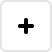
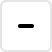
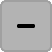
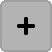
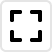
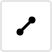
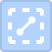

In [1]:
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

In [2]:
mpg_df = pd.read_csv('https://jetbrains.bintray.com/lets-plot/mpg.csv').drop(columns=['Unnamed: 0'])

In [3]:
# stat corr can be used to calculate and display correlation matrix
# stat corr generates new dataframe with variables:
# ..X.. - name of numeric variable from original dataset
# ..Y.. - name of numeric variable from original dataset
# ..corr.. - correlation coefficient for variables ..X.. and ..Y..
# ..corr_abs.. - absolute value of correlation coefficient for variables ..X.. and ..Y..
# it can be used with various geoms, for example tile:
plot = ggplot(mpg_df)
m = aes(width='..corr_abs..', height='..corr_abs..')
plot + geom_tile(stat='corr', mapping=m, size = 0)

In [4]:
# Corr stat has a number of parameters, for example type - 'full', 'upper', 'lower' defines matrix form
# default is 'full'
bunch = GGBunch()
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='upper'), 0, 0)
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='lower'), 500, 0)
bunch

In [5]:
# Parameter fill_diagonal switches on/off visibility of the main matrix diagonal
bunch = GGBunch()
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='upper', fill_diagonal=False), 0, 0)
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='full',  fill_diagonal=False), 500, 0)
bunch

In [6]:
# To improve matrix appearance we can vary geom parameters 
bunch = GGBunch()
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='full'), 0, 0)
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='lower', height = 0.1), 500, 0)
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='full', width=0.1), 0, 350)
bunch.add_plot(plot + geom_tile(stat='corr', mapping=m, size = 0, type='lower', height = 0.1)
               + geom_tile(stat='corr', mapping=m, size = 0, type='upper', width = 0.1), 500, 350)
bunch

In [7]:
# We can also disable unnecessary details and flip the matrix
plot + geom_tile(stat='corr', mapping=m, size = 0) + theme(axis_title=element_blank(),
                                                           legend_title=element_blank(),
                                                           axis_line_x=element_blank(),
                                                           axis_line_y=element_blank()) +\
                                                      scale_y_discrete_reversed() 
                                                    

In [8]:
# Let's change the palette and use another geom
plot + geom_point(stat='corr', size_unit='y') + scale_color_gradient2(name='Corr', low='red', mid='white', high='blue',
                                                                        breaks = [-1.0, -0.5, 0.0, 0.5, 1.0],
                                                                        limits = [-1.0, 0.0, 1.0]) +\
                                                   theme(axis_title=element_blank(),
                                                         legend_title=element_blank(),
                                                         axis_line_x=element_blank(),
                                                         axis_line_y=element_blank()) +\
                                                   scale_y_discrete_reversed() +\
                                                   scale_size_identity(name="", na_value=0) +\
                                                   scale_fill_identity(name="", na_value='rgba(0,0,0,0)')

In [9]:
# A more convenient way is to use predefined functions:
# corr_plot_scatter() function draws correlation matrix with colored circles
# corr_plot_tiles() - corr. matrix with tiles
# corr_plot_tileslab() - corr. matrix with tiles and labels
# corr_plot_scatterlab() draws corr. matrix using circles and labels
bunch=GGBunch()
bunch.add_plot(corr_plot_scatter(mpg_df), 0, 0)
bunch.add_plot(corr_plot_tiles(mpg_df), 400, 0)
bunch.add_plot(corr_plot_tileslab(mpg_df), 0, 300)
bunch.add_plot(corr_plot_scatterlab(mpg_df), 400, 300)
bunch

In [10]:
# Predefined functions have 2 parameters - data to process and palette to change display color
# palette argument can take "BrBG", "PiYG", "PRGn", "PuOr", "RdBu", "RdGy", "RdYlBu", "RdYlGn", "Spectral" values
bunch = GGBunch()
bunch.add_plot(corr_plot_tileslab(mpg_df), 0, 0)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="BrBG"), 0, 300)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="PiYG"), 0, 600)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="PRGn"), 0, 900)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="PuOr"), 0, 1200)
               
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="RdBu"), 400, 0)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="RdGy"), 400, 300)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="RdYlBu"), 400, 600)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="RdYlGn"), 400, 900)
bunch.add_plot(corr_plot_tileslab(mpg_df, palette="Spectral"), 400, 1200)
bunch 

In [12]:
# corr_plot_scatter() and other predefined functions are wrappers 
# on corr_plot class which gives more control on correlation matrix 
# building process
# corr_plot can add three types of layers - scatter, tiles and labels to correlation matrix plot
bunch = GGBunch()
bunch.add_plot(corr_plot(mpg_df).points().build(), 0, 0)
bunch.add_plot(corr_plot(mpg_df).tiles().build(), 500, 0)
bunch.add_plot(corr_plot(mpg_df).labels().build(), 0, 300)
bunch

In [13]:
# corr_plot constructor has three parameters: data, show_legend and flip
# data: data to calculate correlations
# show_legend: Boolean, True by default, switches legend visibility
# flip: Boolean, True by default, flips Y-axis 
bunch = GGBunch()
bunch.add_plot(corr_plot(mpg_df, show_legend=False).tiles().build(), 0, 0)
bunch.add_plot(corr_plot(mpg_df, show_legend=False, flip=False).tiles().build(), 400, 0)
bunch

In [14]:
# Methods points, tiles and labels have two parameters: type and fill_diagonal
# type: String, can be 'full', 'upper' and 'lower', specifies the shape of the matrix - square, upper and lower triangle
# fill_diagonal: Boolean, switches on and off values on the main matrix diagonal
bunch = GGBunch()
bunch.add_plot(corr_plot(mpg_df).points(type='upper', fill_diagonal=False).build(), 0, 0)
bunch.add_plot(corr_plot(mpg_df).points(type='upper', fill_diagonal=True).build(), 400, 0)
bunch.add_plot(corr_plot(mpg_df).points(type='lower', fill_diagonal=False).build(), 0, 300)
bunch.add_plot(corr_plot(mpg_df).points(type='lower', fill_diagonal=True).build(), 400, 300)
bunch.add_plot(corr_plot(mpg_df).points(type='full', fill_diagonal=False).build(), 0, 600)
bunch.add_plot(corr_plot(mpg_df).points(type='full', fill_diagonal=True).build(), 400, 600)
bunch

In [15]:
# Method labels has parameters map_size and color
# map_size: Boolean, makes font size dependent on correlation absolute value
# color: String, sets font color to specific value. Otherwise color is mapped to correlation
bunch = GGBunch()
bunch.add_plot(corr_plot(mpg_df, show_legend = False).labels(map_size=True).build(), 0, 0)
bunch.add_plot(corr_plot(mpg_df, show_legend = False).labels(map_size=False).build(), 400, 0)

bunch.add_plot(corr_plot(mpg_df, show_legend = False).labels(map_size=True, color='red').build(), 0, 400)
bunch.add_plot(corr_plot(mpg_df, show_legend = False).labels(map_size=False, color='blue').build(), 400, 400)
bunch

In [16]:
# more than one layer can be used in single corr. plot
bunch = GGBunch()
bunch.add_plot(corr_plot(mpg_df).tiles().labels(color='white').build(), 0, 0)
bunch.add_plot(corr_plot(mpg_df).points(type = 'upper').
               labels(type = 'lower', fill_diagonal=False).build(), 400, 0)

bunch.add_plot(corr_plot(mpg_df).
               tiles(type='lower', fill_diagonal=False).
               points(type='upper', fill_diagonal=False).
               labels(color='black', map_size=True, fill_diagonal=False).
               build(), 0, 300)

bunch.add_plot(corr_plot(mpg_df).tiles(type = 'lower').
               labels(type = 'upper',  map_size=True).build(), 400, 300)

bunch

In [17]:
# You can change default palette in corr_plot using palette_gradient method
# 3 parameters are required:
# low - color corresponding to correlation -1.0
# mid - corresponds to correlation 0.0
# high - corresponds to correlation 1.0
corr_plot(mpg_df).palette_gradient(low='light_gray', mid='white', high='light_blue').tiles().build()

In [18]:
# or use one of methods palette_BrBG(), palette_PiYG(), palette_PRGn(), palette_PuOr(), palette_RdBu(), palette_RdGy(), 
# palette_RdYlBu(), palette_RdYlGn(), and palette_Spectral() to set predefined palette
bunch = GGBunch()
bunch.add_plot(corr_plot(mpg_df).tiles().build(),0,0)
bunch.add_plot(corr_plot(mpg_df).palette_BrBG().tiles().build(), 0, 300)
bunch.add_plot(corr_plot(mpg_df).palette_PiYG().tiles().build(), 0, 600)
bunch.add_plot(corr_plot(mpg_df).palette_PRGn().tiles().build(), 0, 900)
bunch.add_plot(corr_plot(mpg_df).palette_PuOr().tiles().build(), 0, 1200)
               
bunch.add_plot(corr_plot(mpg_df).palette_RdBu().tiles().build(), 400, 0)
bunch.add_plot(corr_plot(mpg_df).palette_RdGy().tiles().build(), 400, 300)
bunch.add_plot(corr_plot(mpg_df).palette_RdYlBu().tiles().build(), 400, 600)
bunch.add_plot(corr_plot(mpg_df).palette_RdYlGn().tiles().build(), 400, 900)
bunch.add_plot(corr_plot(mpg_df).palette_Spectral().tiles().build(), 400, 1200)
bunch 